Handling outliers Techniques

- Trimming
- capping
- 3rd std
- 5th and 95th std


* what is an outliers ?
-values which are far away and the points which are going to harm our developed model

Trimmig

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('./house_price.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

## checking outliers

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

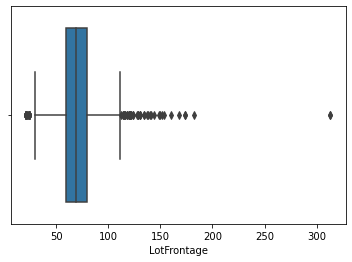

In [6]:
sns.boxplot(df['LotFrontage'])

-Technique
-step to follow
- finding IQR
- find lower limit
- find upper limit

In [7]:
def iqr(df,var):
    iqr = df[var].quantile(0.75) -df[var].quantile(0.25)
    
    upper = df[var].quantile(0.75) + (iqr * 1.5)
    lower = df[var].quantile(0.75) -(iqr * 1.5)
    return upper ,lower

In [8]:
upper_limit_value,lower_limit_value = iqr(df,'LotFrontage')

In [9]:
upper_limit_value,lower_limit_value

(111.5, 48.5)

In [10]:
df['LotFrontage_replaced'] =np.where(df['LotFrontage'] > upper_limit_value, upper_limit_value,
                                     np.where(df['LotFrontage'] < lower_limit_value, lower_limit_value,df['LotFrontage']))

In [11]:
df['LotFrontage_replaced']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage_replaced, Length: 1460, dtype: float64

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage_replaced'>

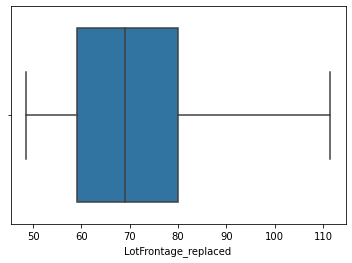

In [12]:
sns.boxplot(df['LotFrontage_replaced'])

## capping

## steps to follow
- upper and lower limit but using and std

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

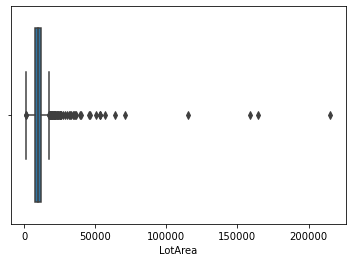

In [14]:
sns.boxplot(df['LotArea'])

In [15]:
def iqr1(df,var):
   
    upper = df[var].mean() + 3 * df[var].std()
    lower = df[var].mean() - 3 * df[var].std()
    return upper ,lower

In [16]:
upper_limit_value,lower_limit_value = iqr1(df,'LotArea')

In [17]:
upper_limit_value,lower_limit_value

(40460.62287932922, -19426.966714945658)

In [18]:
df['LotArea_replaced'] =np.where(df['LotArea'] > upper_limit_value, upper_limit_value,
                       np.where(df['LotArea'] < lower_limit_value, lower_limit_value,df['LotArea']))

In [19]:
df['LotArea_replaced']

0        8450.0
1        9600.0
2       11250.0
3        9550.0
4       14260.0
         ...   
1455     7917.0
1456    13175.0
1457     9042.0
1458     9717.0
1459     9937.0
Name: LotArea_replaced, Length: 1460, dtype: float64

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea_replaced'>

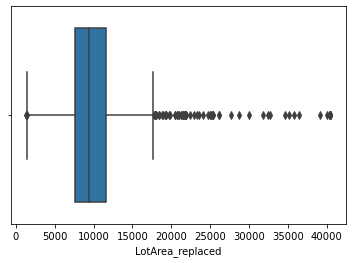

In [20]:
sns.boxplot(df['LotArea_replaced'])

## 5th and 95th quantile

In [21]:
def  iqr2(df,var):
   
    upper = df[var].quantile(0.95)
    
    lower = df[var].quantile(0.95)
    
    return upper ,lower

In [22]:
upper_limit_value,lower_limit_value = iqr2(df,'LotArea_replaced')

In [23]:
upper_limit_value,lower_limit_value

(17401.149999999998, 17401.149999999998)

In [24]:
df['LotArea_replaced_95'] =np.where(df['LotArea_replaced'] > upper_limit_value, upper_limit_value,
                          np.where(df['LotArea_replaced'] < lower_limit_value, lower_limit_value,df['LotArea_replaced']))

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea_replaced_95'>

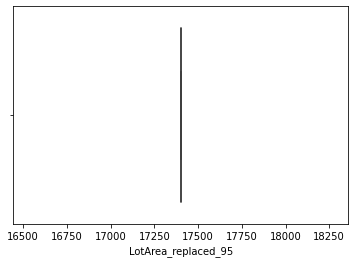

In [25]:
sns.boxplot(df['LotArea_replaced_95'])

In [26]:
upper_limit_value,lower_limit_value = iqr(df,'LotArea_replaced_95')

In [27]:
upper_limit_value,lower_limit_value

(17401.149999999998, 17401.149999999998)

In [28]:
df['LotArea_replaced_95_iqr'] =np.where(df['LotArea_replaced_95'] > upper_limit_value, upper_limit_value,
                          np.where(df['LotArea_replaced_95'] < lower_limit_value, lower_limit_value,df['LotArea_replaced_95']))

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea_replaced_95_iqr'>

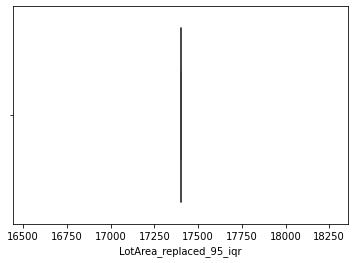

In [29]:
sns.boxplot(df['LotArea_replaced_95_iqr'])

In [30]:
len(df['LotArea_replaced_95_iqr'])

1460

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea_replaced_95_iqr', ylabel='Density'>

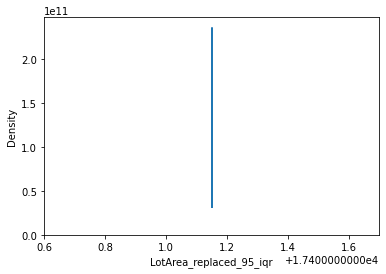

In [31]:
sns.distplot(df['LotArea_replaced_95_iqr'])

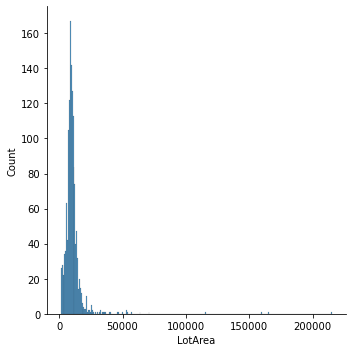

In [32]:
sns.displot(df['LotArea'])

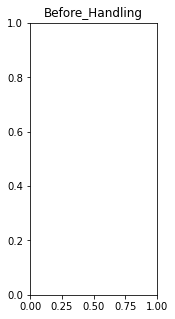

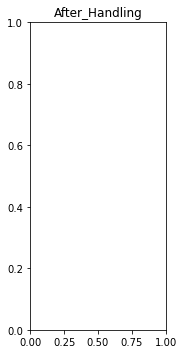

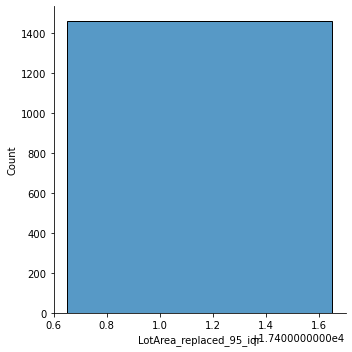

In [34]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Before_Handling')
sns.displot(df['LotArea'])
plt.subplot(1,2,2)
plt.title('After_Handling')
sns.displot(df['LotArea_replaced_95_iqr'])
plt.show()